In [1]:
import pandas as pd
import numpy as np
import time
import warnings
import shap
from statwolfml import Builder
from ACME import ACME

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Full Boston dataset

In [3]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
        
dataframe = pd.DataFrame(X, columns=boston.feature_names)
dataframe['target'] = y

In [4]:
features = dataframe.drop(columns={'target'}).columns

## Train different model

In [5]:
models_name = ['linear_regression','random_forest_regressor','catboost_regressor','sgd_regressor','svr']
models = {}
for model in models_name:
        build_model = Builder(model).feature_names(features).labels(['target']).build()
        train_model = build_model.train(dataframe)
        models[model] = train_model

### Compare ASHAP and SHAP results

In [6]:
time_start = {}
time_elapsed = {}

In [9]:
acme = ACME(models['random_forest_regressor'].base_model()['model'],'target')
time_start = time.clock()
for i in range(0,len(dataframe)):
    acme.fit_local(dataframe,local=i)
print(time.clock() - time_start)

234.06908200000004


### Random Forest

In [18]:
time_start = time.clock()
acme_rf = ACME(models['random_forest_regressor'].base_model()['model'],'target')
acme_rf = acme_rf.fit(dataframe)
time_elapsed['ASHAP_RF'] = (time.clock() - time_start)

In [19]:
time_start = time.clock()
shap_1 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 1))
shap_1_values = shap_1.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_1'] = (time.clock() - time_start)

In [20]:
time_start = time.clock()
shap_5 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 5))
shap_5_values = shap_5.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_5'] = (time.clock() - time_start)

In [21]:
time_start = time.clock()
shap_10 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 10))
shap_10_values = shap_10.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_10'] = (time.clock() - time_start)

In [22]:
time_start = time.clock()
shap_20 = shap.KernelExplainer(models['svr'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 20))
shap_20_values = shap_20.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_20'] = (time.clock() - time_start)

In [23]:
time_start = time.clock()
shap_100 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 100))
shap_100_values = shap_100.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_100'] = (time.clock() - time_start)

In [24]:
print(pd.DataFrame(time_elapsed, index=['Elapsed Time']).T.to_latex())

\begin{tabular}{lr}
\toprule
{} &  Elapsed Time \\
\midrule
ASHAP\_RF &      0.466455 \\
SHAP\_1   &    722.711377 \\
SHAP\_5   &    859.156538 \\
SHAP\_10  &    888.987182 \\
SHAP\_20  &   1185.972149 \\
SHAP\_100 &   1779.506654 \\
\bottomrule
\end{tabular}



### VISUALIZATION

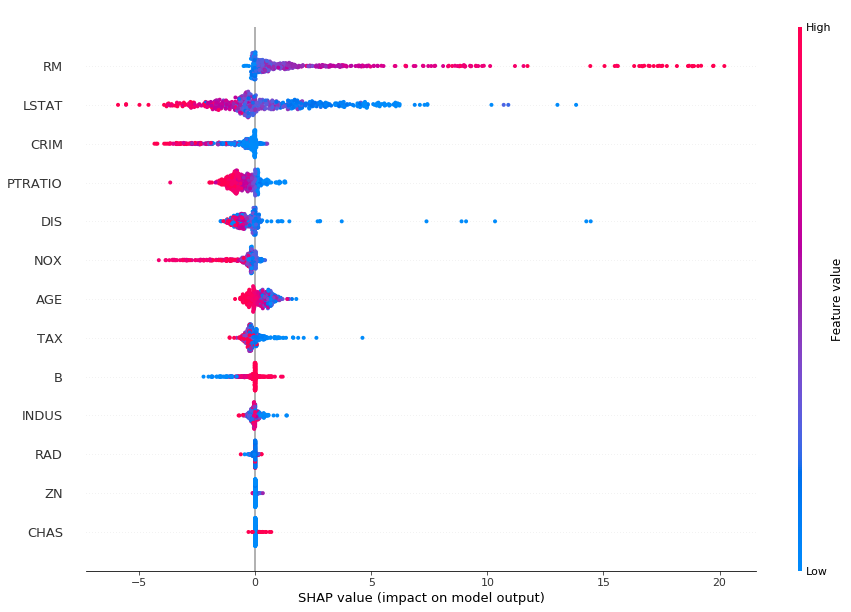

In [25]:
shap.summary_plot(shap_1_values, dataframe.drop(columns='target'), plot_size=(15,10), show=False)
plt.savefig('shap_1.pdf', format='pdf')

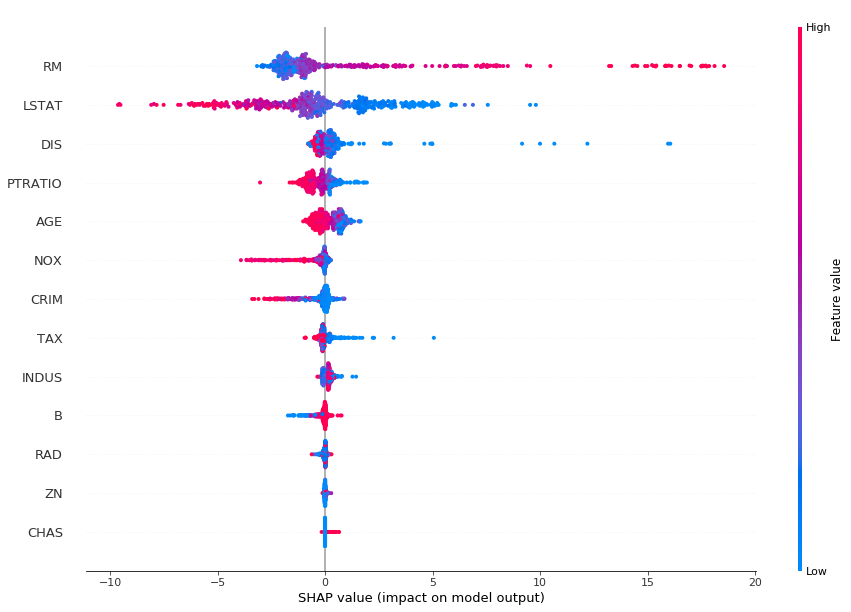

In [26]:
shap.summary_plot(shap_5_values, dataframe.drop(columns='target'), plot_size=(15,10), show=False)
plt.savefig('shap_5.pdf', format='pdf')

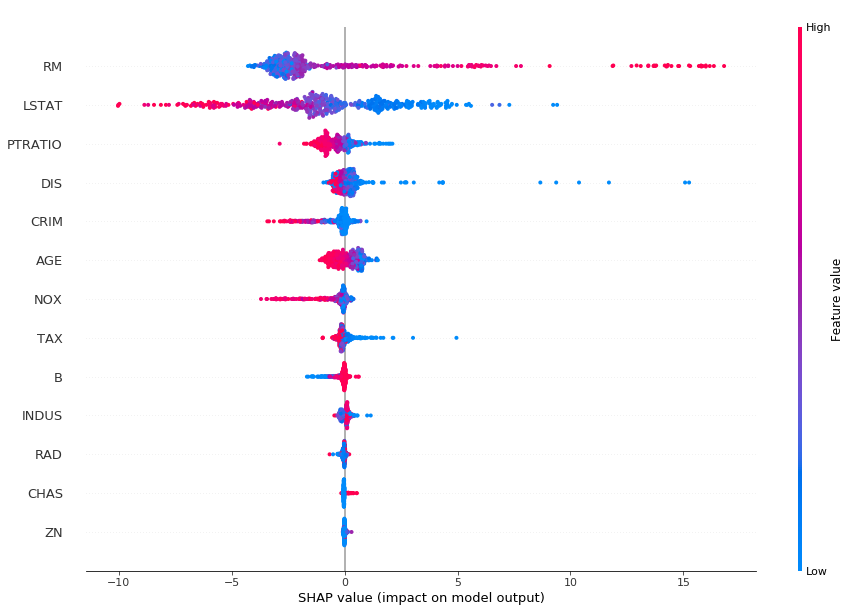

In [27]:
shap.summary_plot(shap_10_values, dataframe.drop(columns='target'), plot_size=(15,10), show=False)
plt.savefig('shap_10.pdf', format='pdf')

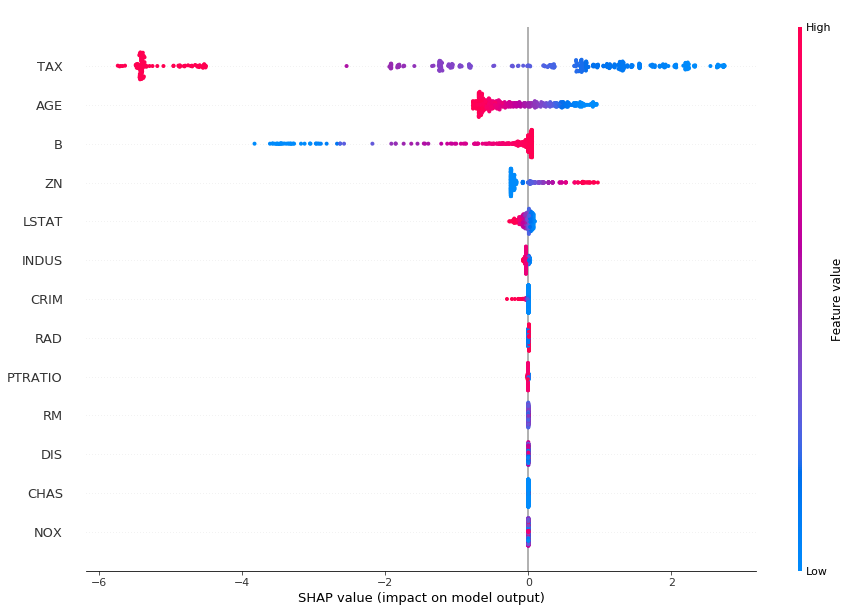

In [28]:
shap.summary_plot(shap_20_values, dataframe.drop(columns='target'), plot_size=(15,10), show=False)
plt.savefig('shap_20.pdf', format='pdf')

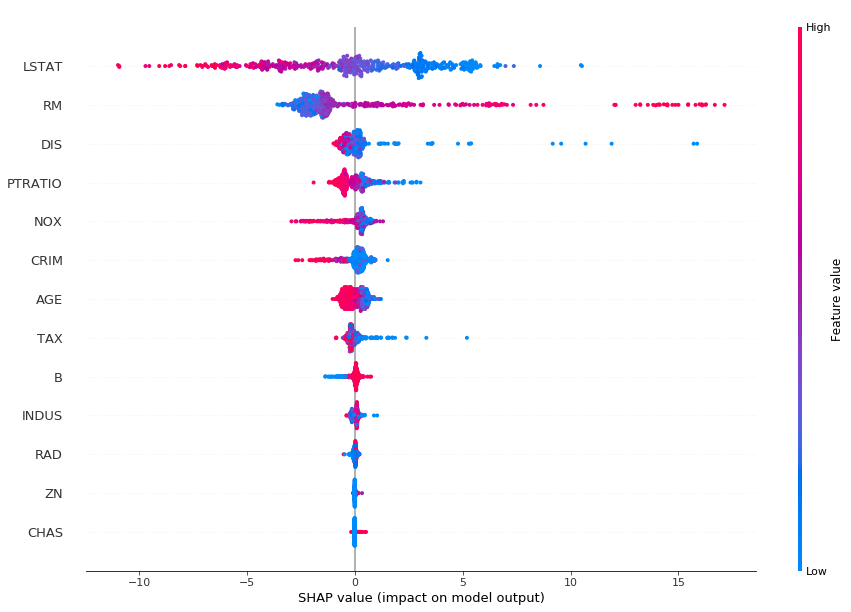

In [29]:
shap.summary_plot(shap_100_values, dataframe.drop(columns='target'), plot_size=(15,10), show=False)
plt.savefig('shap_100.pdf', format='pdf')

## USE THE NSAMPLE

In [30]:
time_start = time.clock()
shap_samp_10 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_10_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=10)
time_elapsed['SHAP_10_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [31]:
time_start = time.clock()
shap_samp_25 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_25_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=25)
time_elapsed['SHAP_25_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [32]:
time_start = time.clock()
shap_samp_50 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_50_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=50)
time_elapsed['SHAP_50_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [33]:
time_start = time.clock()
shap_samp_100 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_100_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=100)
time_elapsed['SHAP_100_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KeyboardInterrupt: 

### VISUALIZATION

In [ ]:
shap.summary_plot(shap_samp_10_values, dataframe.drop(columns='target'), plot_size=(15,10))

In [ ]:
shap.summary_plot(shap_samp_25_values, dataframe.drop(columns='target'), plot_size=(15,10))

In [ ]:
shap.summary_plot(shap_samp_50_values, dataframe.drop(columns='target'), plot_size=(15,10))

In [ ]:
shap.summary_plot(shap_samp_100_values, dataframe.drop(columns='target'), plot_size=(15,10))

### COMBINED

In [ ]:
time_start = time.clock()
shap_100_100 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 100))
shap_100_100_values = shap_100.shap_values(dataframe.drop(columns='target'), nsamples=100)
time_elapsed['SHAP_100_100'] = (time.clock() - time_start)

In [ ]:
shap.summary_plot(shap_100_100_values, dataframe.drop(columns='target'), plot_size=(15,10))

In [ ]:
print(pd.DataFrame(time_elapsed, index=['Elapsed Time']).T.to_latex())